 # Injury Risk Prediction in Football :  Machine Learning Approach

This project predict football players' injury risk using machine learning. By analyzing player attributes, match statistics, and injury history, we identify key factors of injuries. The goal is to support better player management and injury prevention using machine learning.This dataset is from Kaggle(https://www.kaggle.com/datasets/kolambekalpesh/football-player-injury-data/data). The data include both numerical and categorical variables.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("football_injury.csv")

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   p_id2                              1301 non-null   object 
 1   start_year                         1301 non-null   int64  
 2   season_days_injured                1301 non-null   int64  
 3   total_days_injured                 1301 non-null   int64  
 4   season_minutes_played              1301 non-null   int64  
 5   season_games_played                1301 non-null   int64  
 6   season_matches_in_squad            1301 non-null   int64  
 7   total_minutes_played               1301 non-null   int64  
 8   total_games_played                 1301 non-null   int64  
 9   dob                                1301 non-null   object 
 10  height_cm                          1301 non-null   float64
 11  weight_kg                          1301 non-null   float

In [4]:
df.describe()

,start_year,season_days_injured,total_days_injured,season_minutes_played,season_games_played,season_matches_in_squad,total_minutes_played,total_games_played,height_cm,weight_kg,...,cumulative_games_played,minutes_per_game_prev_seasons,avg_days_injured_prev_seasons,avg_games_per_season_prev_seasons,bmi,work_rate_numeric,position_numeric,significant_injury_prev_season,cumulative_days_injured,season_days_injured_prev_season
count,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,...,697.000000,685.000000,697.000000,697.000000,1301.000000,1301.000000,1301.000000,697.000000,697.000000,697.000000
mean,2018.099923,78.642583,260.710992,1483.156034,19.509608,25.089931,5533.593390,71.638739,182.516205,76.833935,...,53.279770,74.541947,79.501987,21.952038,23.039310,3.346272,1.820907,0.225251,786.351506,81.279770
std,1.384810,84.817246,202.741896,1014.013920,11.099727,10.157698,4095.421082,46.854260,6.821092,7.362975,...,63.111519,17.856054,71.057640,9.408793,1.470255,0.392971,1.001257,0.418048,1064.323175,84.353614
min,2016.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,163.000000,58.000000,...,0.000000,7.000000,2.000000,0.000000,18.792451,2.500000,0.000000,0.000000,7.000000,0.000000
25%,2017.000000,23.000000,111.000000,612.000000,10.000000,19.000000,2012.000000,31.000000,178.000000,72.000000,...,23.000000,65.500000,29.000000,16.000000,22.093170,3.000000,1.000000,0.000000,191.000000,26.000000
50%,2018.000000,49.000000,210.000000,1440.000000,21.000000,28.000000,5023.000000,69.000000,183.000000,76.000000,...,35.000000,80.080645,60.500000,23.000000,23.074830,3.500000,2.000000,0.000000,427.000000,50.000000
75%,2019.000000,103.000000,370.000000,2311.000000,29.000000,33.000000,8387.000000,107.000000,187.666667,82.000000,...,64.000000,87.925926,111.500000,29.000000,23.947116,3.500000,3.000000,0.000000,903.000000,109.000000
max,2020.000000,702.000000,2398.000000,3610.000000,38.000000,54.000000,16768.000000,179.000000,203.000000,99.000000,...,508.000000,95.000000,702.000000,38.000000,28.525475,4.000000,3.000000,1.000000,7590.000000,702.000000


In [5]:
df.head(10)

,p_id2,start_year,season_days_injured,total_days_injured,season_minutes_played,season_games_played,season_matches_in_squad,total_minutes_played,total_games_played,dob,...,cumulative_games_played,minutes_per_game_prev_seasons,avg_days_injured_prev_seasons,avg_games_per_season_prev_seasons,bmi,work_rate_numeric,position_numeric,significant_injury_prev_season,cumulative_days_injured,season_days_injured_prev_season
0,aaronconnolly,2019,13,161,1312,24,28,2148,41,28/01/2000,...,NaN,NaN,NaN,NaN,24.613627,2.5,2,NaN,NaN,NaN
1,aaronconnolly,2020,71,161,836,17,28,2148,41,28/01/2000,...,24.0,54.666667,13.000000,24.000000,24.613627,2.5,2,0.0,161.0,13.0
2,aaroncresswell,2016,95,226,2247,26,27,13368,149,15/12/1989,...,NaN,NaN,NaN,NaN,22.396079,3.5,1,NaN,NaN,NaN
3,aaroncresswell,2018,87,226,1680,20,27,13368,149,15/12/1989,...,26.0,86.423077,95.000000,26.000000,22.396079,3.5,1,0.0,226.0,95.0
4,aaroncresswell,2019,35,226,2870,31,31,13368,149,15/12/1989,...,46.0,85.369565,91.000000,23.000000,22.396079,3.5,1,0.0,452.0,87.0
5,aaroncresswell,2020,9,226,3342,36,36,13368,149,15/12/1989,...,77.0,88.272727,72.333333,25.666667,22.396079,3.5,1,0.0,678.0,35.0
6,aaronlennon,2017,30,199,1996,29,29,4371,72,16/04/1987,...,NaN,NaN,NaN,NaN,23.140496,4.0,3,NaN,NaN,NaN
7,aaronlennon,2018,166,199,1279,16,16,4371,72,16/04/1987,...,29.0,68.827586,33.000000,29.000000,23.140496,4.0,3,0.0,199.0,33.0
8,aaronmooy,2017,26,130,3226,36,36,7942,96,15/09/1990,...,NaN,NaN,NaN,NaN,24.102610,3.0,3,NaN,NaN,NaN
9,aaronmooy,2018,89,130,2467,29,29,7942,96,15/09/1990,...,36.0,89.611111,26.000000,36.000000,24.102610,3.0,3,0.0,130.0,26.0


In [6]:
df.shape

(1301, 30)

This dataset has 30 columns and 1,302 rows. It contains football players’ physical attributes, performance data, injury records from previous and current seasons, and match statistics.

### Cleaning and Preprocessing

In [7]:
df.isnull()

,p_id2,start_year,season_days_injured,total_days_injured,season_minutes_played,season_games_played,season_matches_in_squad,total_minutes_played,total_games_played,dob,...,cumulative_games_played,minutes_per_game_prev_seasons,avg_days_injured_prev_seasons,avg_games_per_season_prev_seasons,bmi,work_rate_numeric,position_numeric,significant_injury_prev_season,cumulative_days_injured,season_days_injured_prev_season
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,False,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1297,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,False,True,True,True
1298,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,False,True,True,True
1299,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,False,True,True,True


In [8]:
df.isnull().sum()

p_id2                                  0
start_year                             0
season_days_injured                    0
total_days_injured                     0
season_minutes_played                  0
season_games_played                    0
season_matches_in_squad                0
total_minutes_played                   0
total_games_played                     0
dob                                    0
height_cm                              0
weight_kg                              0
nationality                            0
work_rate                              0
pace                                  95
physic                                95
fifa_rating                            0
position                               0
age                                    0
cumulative_minutes_played            604
cumulative_games_played              604
minutes_per_game_prev_seasons        616
avg_days_injured_prev_seasons        604
avg_games_per_season_prev_seasons    604
bmi             

In [9]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

p_id2                                 0.000000
start_year                            0.000000
season_days_injured                   0.000000
total_days_injured                    0.000000
season_minutes_played                 0.000000
season_games_played                   0.000000
season_matches_in_squad               0.000000
total_minutes_played                  0.000000
total_games_played                    0.000000
dob                                   0.000000
height_cm                             0.000000
weight_kg                             0.000000
nationality                           0.000000
work_rate                             0.000000
pace                                  7.302075
physic                                7.302075
fifa_rating                           0.000000
position                              0.000000
age                                   0.000000
cumulative_minutes_played            46.425826
cumulative_games_played              46.425826
minutes_per_g

In [10]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1296    False
1297    False
1298    False
1299    False
1300    False
Length: 1301, dtype: bool

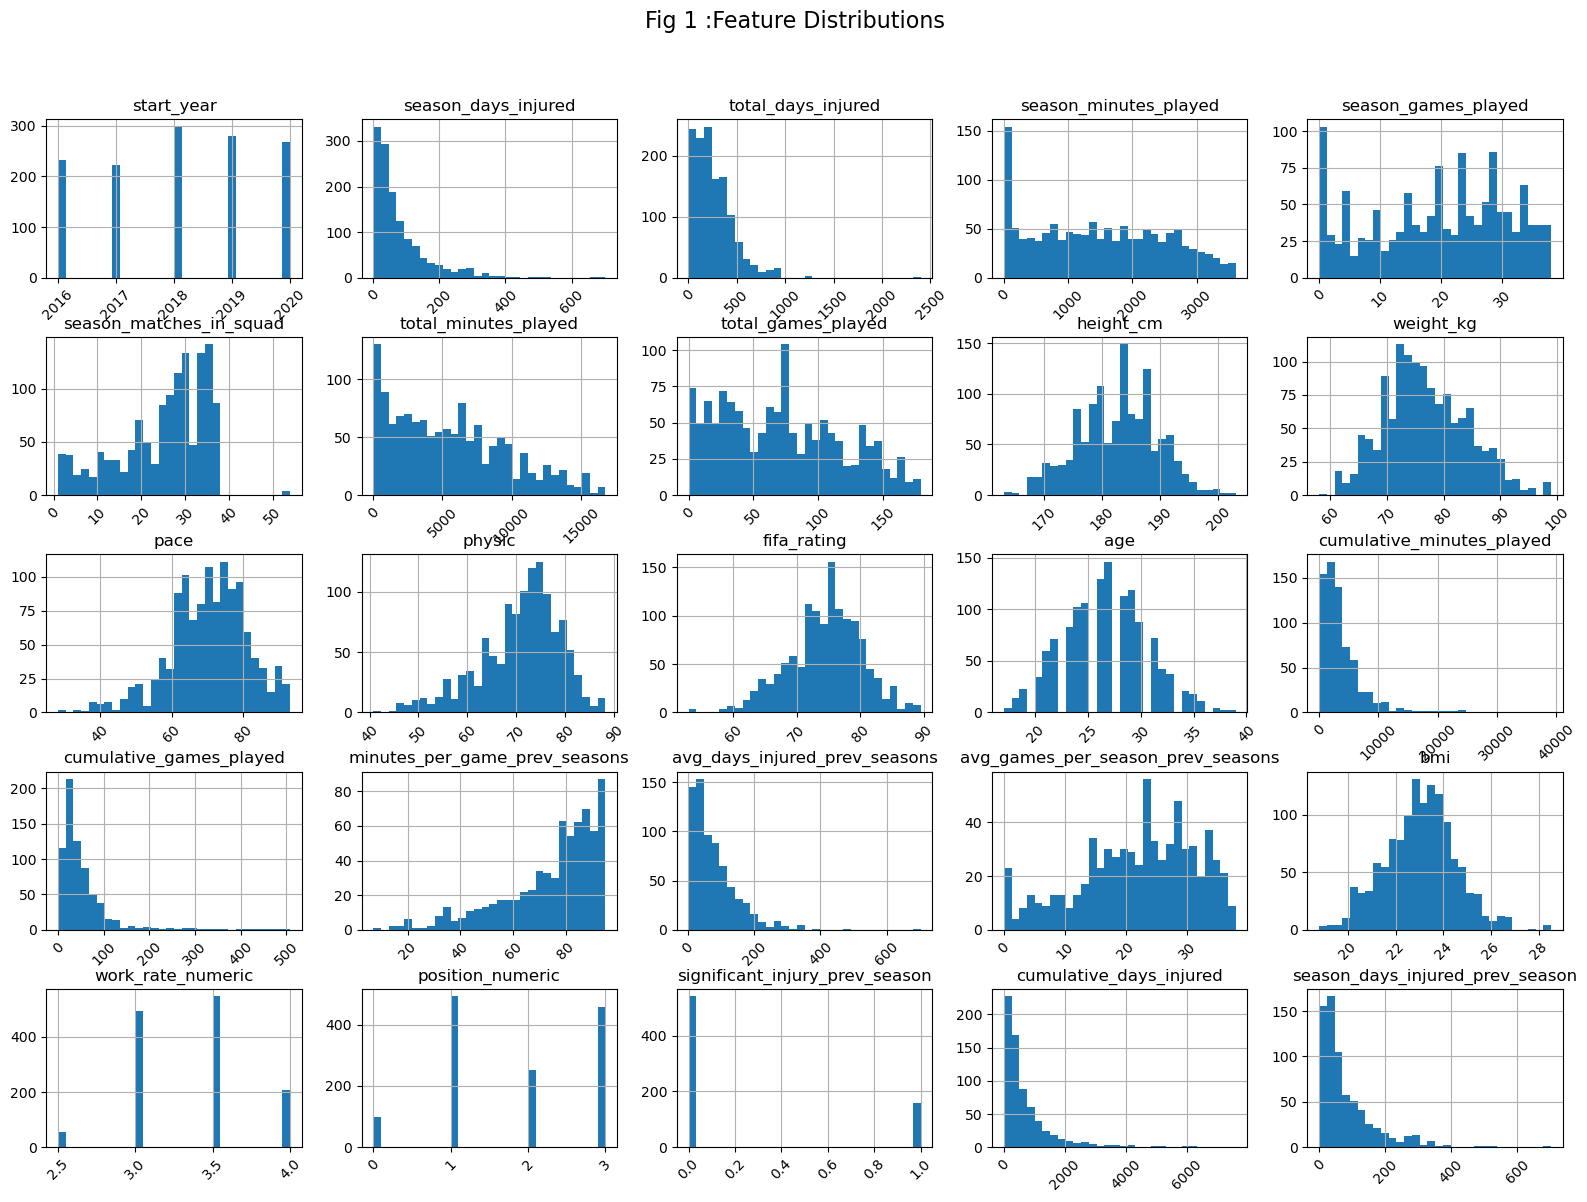

In [11]:
df.hist(figsize=(16, 12), bins=30)

plt.suptitle("Fig 1 :Feature Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95]) 

for ax in plt.gcf().axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

plt.show()

Figure 1 shows the feature distribution of this dataset. There are both categorical and numerical features. Among the numerical data, season_days_injured and total_days_injured show positive skewness, while season_matches_in_squad is negatively skewed. Other features are approximately normally distributed.

In [12]:
colums_to_fill = [
    "cumulative_minutes_played",
    "cumulative_games_played",
    "minutes_per_game_prev_seasons",
    "avg_days_injured_prev_seasons",
    "avg_games_per_season_prev_seasons",
    "significant_injury_prev_season",
    "cumulative_days_injured",
    "season_days_injured_prev_season"
]

df[colums_to_fill] = df[colums_to_fill].fillna(0)


In [13]:
df = df.dropna(subset=['pace', 'physic'])

In [14]:
df.isnull().sum()

p_id2                                0
start_year                           0
season_days_injured                  0
total_days_injured                   0
season_minutes_played                0
season_games_played                  0
season_matches_in_squad              0
total_minutes_played                 0
total_games_played                   0
dob                                  0
height_cm                            0
weight_kg                            0
nationality                          0
work_rate                            0
pace                                 0
physic                               0
fifa_rating                          0
position                             0
age                                  0
cumulative_minutes_played            0
cumulative_games_played              0
minutes_per_game_prev_seasons        0
avg_days_injured_prev_seasons        0
avg_games_per_season_prev_seasons    0
bmi                                  0
work_rate_numeric        

In [15]:
df.shape

(1206, 30)

## EDA

### Define injury risk

In [16]:
df['injury_risk'] = df['season_days_injured'].apply(lambda x: 1 if x > 31 else 0)

In [17]:
injury_counts = df['injury_risk'].value_counts()
print(injury_counts)

injury_risk
1    755
0    451
Name: count, dtype: int64


In [18]:
position_injury_totals = df.groupby('position')['season_days_injured'].sum()
print(position_injury_totals)

position
Defender      38967
Forward       19871
Goalkeeper     1127
Midfielder    35733
Name: season_days_injured, dtype: int64


In [19]:
total_injuries = position_injury_totals.sum()
injury_percentage = (position_injury_totals / total_injuries * 100).sort_values()

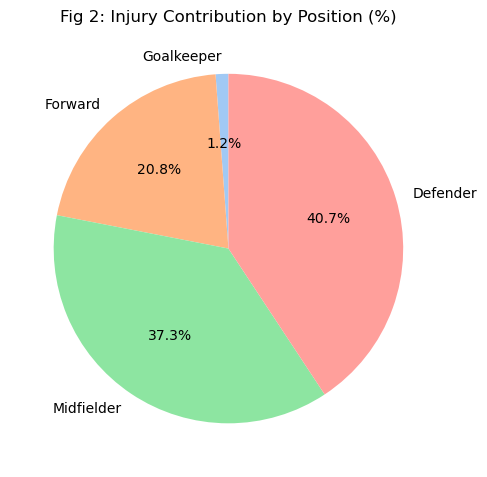

In [20]:
plt.figure(figsize=(5, 5))
injury_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("Fig 2: Injury Contribution by Position (%)")
plt.ylabel("")
plt.tight_layout()
plt.show()


Figure 2 shows injury risk by player position. According to this figure, defenders are injured more often than others, followed by midfielders. Goalkeepers are the least injured.

In [21]:
def categorize_age(age):
    if age < 23:
        return 'Below 23'
    elif 23 <= age < 30:
        return 'Between 23 and 30'
    else:
        return 'After 30'
    
df['age_category'] = df['age'].apply(categorize_age)

age_injury_totals = df.groupby('age_category')['season_days_injured'].sum().sort_values()


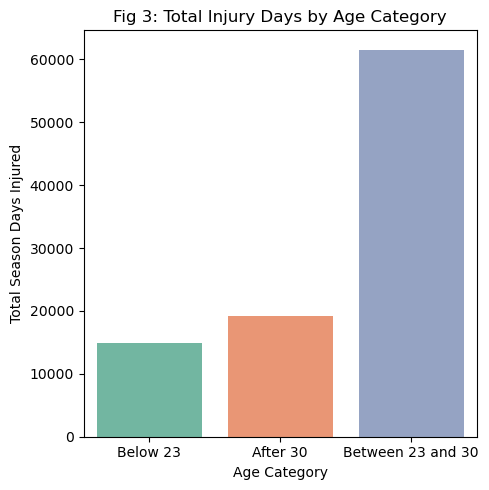

In [57]:
plt.figure(figsize=(5, 5))
sns.barplot(x=age_injury_totals.index, y=age_injury_totals.values, palette='Set2')
plt.title('Fig 3: Total Injury Days by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Total Season Days Injured')
plt.tight_layout()
plt.show()

Figure 3 shows injury risk by age. Players between 23 and 30 years old experience more injuries compared to other age groups.

In [23]:
workrate_injury_totals = df.groupby('work_rate')['season_days_injured'].sum().sort_values()

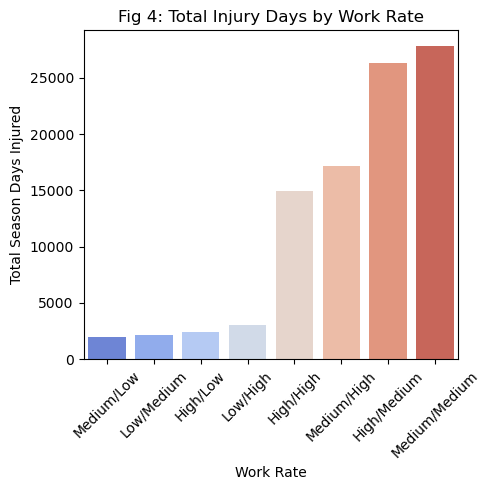

In [58]:
plt.figure(figsize=(5, 5))
sns.barplot(x=workrate_injury_totals.index, y=workrate_injury_totals.values, palette='coolwarm')
plt.title('Fig 4: Total Injury Days by Work Rate')
plt.xlabel('Work Rate')
plt.ylabel('Total Season Days Injured')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Figure 4 shows the total injuries by work rate. According to the figure, players with a Medium/Medium work rate have the highest number of injuries, followed by those with a High/Medium work rate. The lowest number of injuries is observed among players with a Medium/Low work rate.

In [25]:
def categorize_physic(value):
    if value < 60:
        return 'Low'
    elif 60 <= value < 75:
        return 'Medium'
    else:
        return 'High'

df['physic_category'] = df['physic'].apply(categorize_physic)

physic_injury_totals = df.groupby('physic_category')['season_days_injured'].sum().sort_values()


Text(0, 0.5, 'Total Season Days Injured')

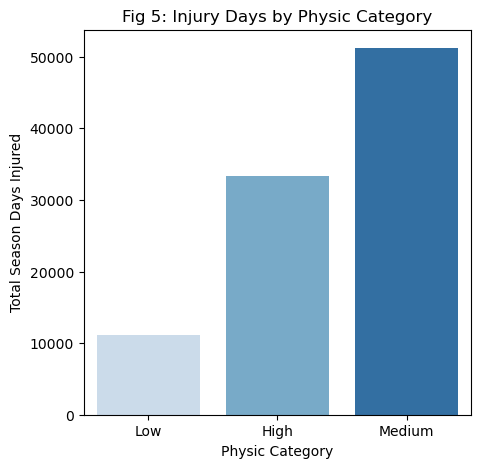

In [59]:
plt.figure(figsize=(5, 5))

sns.barplot(x=physic_injury_totals.index, y=physic_injury_totals.values, palette='Blues')
plt.title('Fig 5: Injury Days by Physic Category')
plt.xlabel('Physic Category')
plt.ylabel('Total Season Days Injured')

Figure 5 shows the impact of physicality on players' injuries. Players with medium physicality have the highest number of injury days, followed by those with high physicality.

In [27]:
def categorize_pace(value):
    if value < 60:
        return 'Low'
    elif 60 <= value < 75:
        return 'Medium'
    else:
        return 'High'

df['pace_category'] = df['pace'].apply(categorize_pace)

pace_injury_totals = df.groupby('pace_category')['season_days_injured'].sum().sort_values()


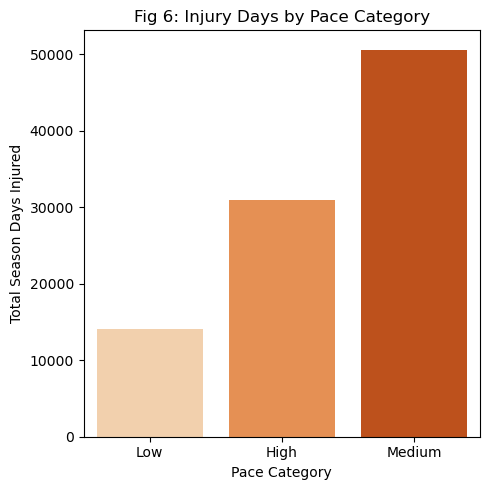

In [60]:
plt.figure(figsize=(5, 5))

sns.barplot(x=pace_injury_totals.index, y=pace_injury_totals.values, palette='Oranges')
plt.title('Fig 6: Injury Days by Pace Category')
plt.xlabel('Pace Category')
plt.ylabel('Total Season Days Injured')

plt.tight_layout()
plt.show()

Figure 6 shows the effect of pace (speed) on injury risk. Players with medium pace have the highest number of injury days, followed by those with high pace.

In [29]:
pace_by_age_group= df.groupby('age_category')['pace'].mean().sort_values(ascending=False)


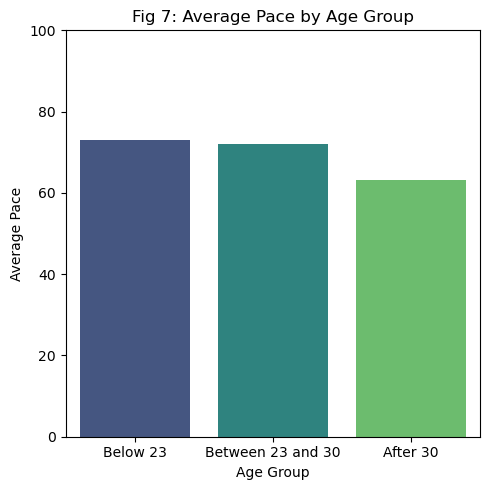

In [61]:
plt.figure(figsize=(5, 5))
sns.barplot(x=pace_by_age_group.index, y=pace_by_age_group.values, palette='viridis')
plt.title("Fig 7: Average Pace by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Pace")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

Figure 7 shows the impact of age on pace. The high-pace category includes those below 23 years of age, while the low-pace category consists of those over 30.

In [31]:
def categorize_height(h):
    if h < 170:
        return 'Below 170'
    elif 170 <= h < 185:
        return 'Between 170 and 185'
    else:
        return 'After 185'

df['height_group'] = df['height_cm'].apply(categorize_height)

Injury_days_by_height = df.groupby('height_group')['season_days_injured'].mean().sort_values()
print(Injury_days_by_height)

height_group
Between 170 and 185    75.361264
After 185              85.190367
Below 170              87.904762
Name: season_days_injured, dtype: float64


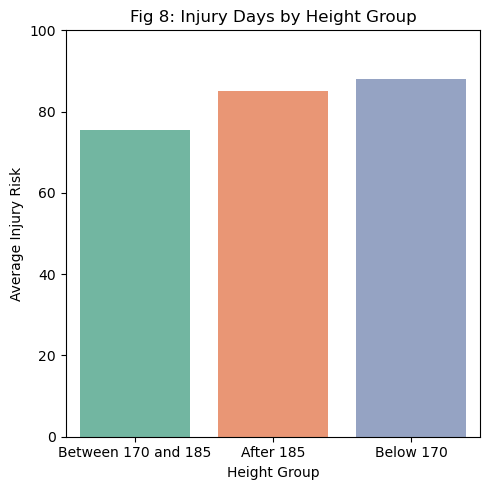

In [62]:
plt.figure(figsize=(5, 5))
sns.barplot(x=Injury_days_by_height.index, y=Injury_days_by_height.values, palette='Set2')
plt.title("Fig 8: Injury Days by Height Group")
plt.xlabel("Height Group")
plt.ylabel("Average Injury Risk")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


Figure 8 illustrates the impact of height on injury risk. The highest risk is observed in individuals below 170 cm, followed by those exceeding 185 cm.

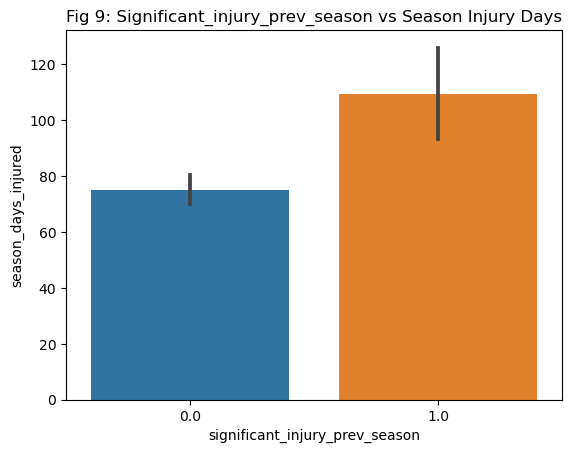

In [33]:
sns.barplot(data=df, x='significant_injury_prev_season', y='season_days_injured')
plt.title('Fig 9: Significant_injury_prev_season vs Season Injury Days')
plt.show()

Figure 9 shows the significance of previous season injuries on current season injury risk.

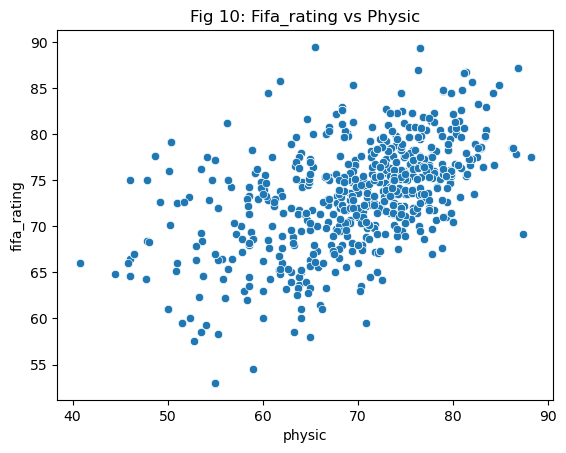

In [34]:
sns.scatterplot(data=df, x='physic', y='fifa_rating')
plt.title('Fig 10: Fifa_rating vs Physic')
plt.show()

Figure 10 illustrates the relationship between FIFA ratings and a player’s pace.

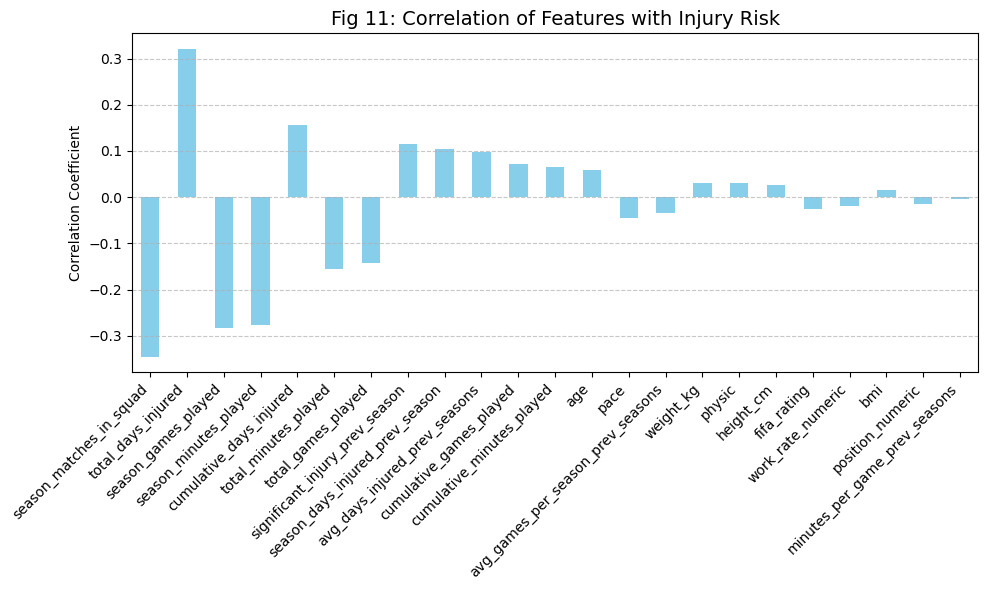

In [35]:
df_corrl = df.select_dtypes(include='number').drop(columns=['start_year','season_days_injured'])

injury_corr = df_corrl.corr()['injury_risk'].drop('injury_risk').sort_values(key=abs, ascending=False)

plt.figure(figsize=(10, 6))
injury_corr.plot(kind='bar', color='skyblue')
plt.title("Fig 11: Correlation of Features with Injury Risk", fontsize=14)
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Figure 11 shows the correlation between injury risk and other variables.

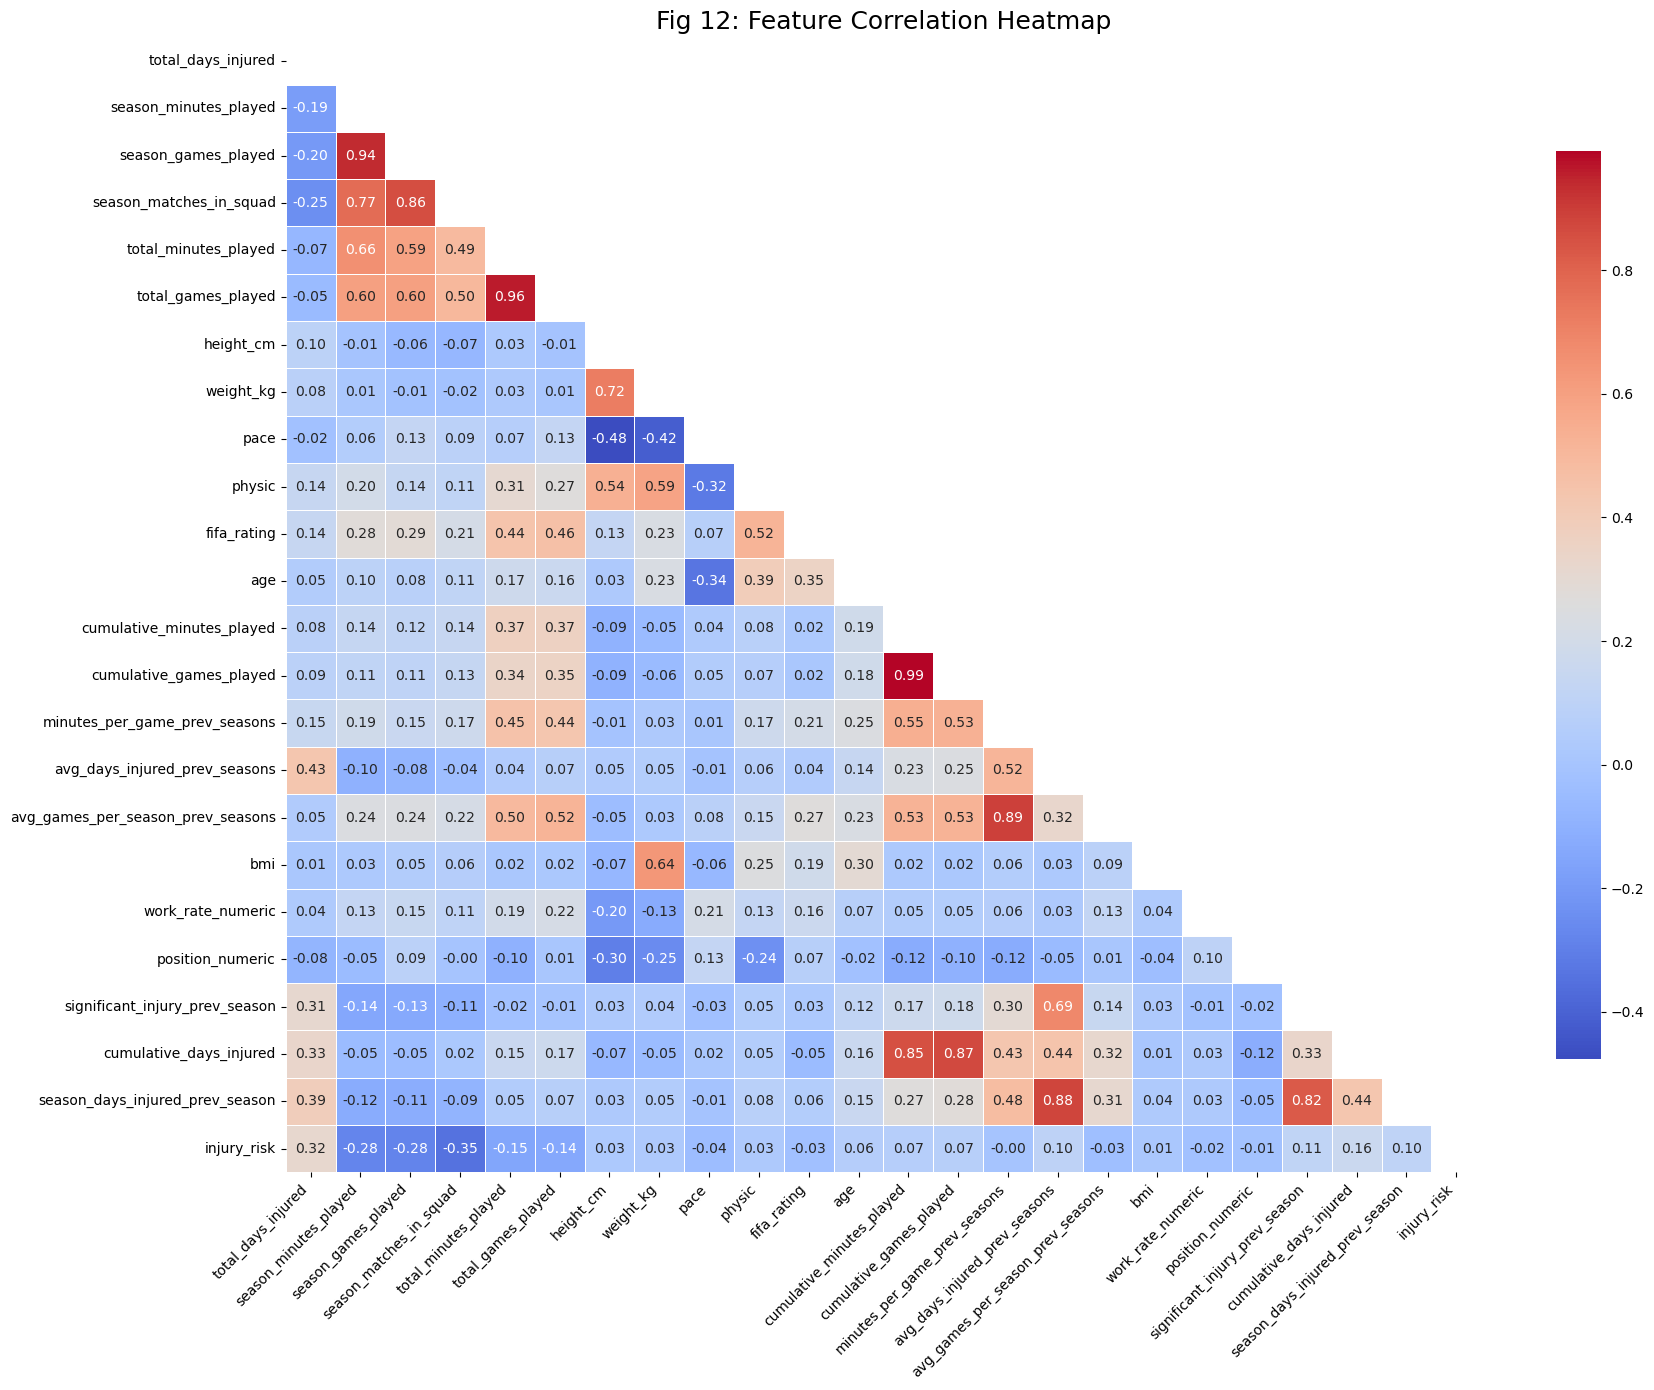

In [36]:
correlation = df_corrl.corr()

mask = np.triu(np.ones_like(correlation, dtype=bool))

plt.figure(figsize=(18, 14))
sns.heatmap(correlation, mask=mask, cmap='coolwarm', annot=True, fmt=".2f",
            annot_kws={"size": 10}, linewidths=0.5, cbar_kws={"shrink": 0.8})

plt.title("Fig 12: Feature Correlation Heatmap", fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Figure 12 shows the correlation heatmap of the features.

### Feature Selection

In [37]:
features = [
    "height_cm", "weight_kg", "bmi", "season_minutes_played", "season_games_played","age",
    "pace", "physic", "fifa_rating", "cumulative_minutes_played", "minutes_per_game_prev_seasons",
    "avg_days_injured_prev_seasons", "significant_injury_prev_season", "season_days_injured_prev_season",
    "position_numeric","total_minutes_played"]

X = df[features] 
Y = df['injury_risk']

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
model_1 = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')
model_1.fit(X_train, Y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [40]:
importances = model_1.feature_importances_
feature_names = X.columns

In [41]:
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


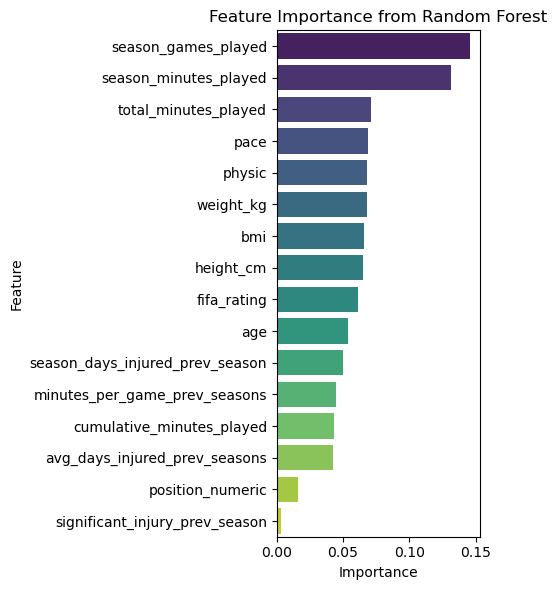

In [63]:
plt.figure(figsize=(5, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title("Feature Importance from Random Forest")
plt.tight_layout()
plt.show()

### Model Building

In this study, we aim to predict injury risk, which is a binary categorical feature. Therefore, suitable models for this task include Random Forest, Logistic Regression, and Support Vector Machine (SVM). We evaluate the performance of each of these algorithms to identify the most effective model for predicting injury risk.

#### Random Foreset

In [43]:
top_features = feature_importance_df.head(15)['Feature'].tolist()

X_top = df[top_features]


In [44]:
X_train_top, X_test_top, Y_train_top, Y_test_top = train_test_split(X_top, Y, test_size=0.2, random_state=42)
X_train_top = scaler.fit_transform(X_train_top)
X_test_top = scaler.transform(X_test_top)


In [45]:
model_top = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model_top.fit(X_train_top, Y_train_top)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [46]:
Y_pred_1 = model_top.predict(X_test_top)

In [47]:
print("Accuracy:", accuracy_score(Y_test_top, Y_pred_1))
print("Classification Report:\n", classification_report(Y_test_top, Y_pred_1))

Accuracy: 0.6776859504132231
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.36      0.48        99
           1       0.67      0.90      0.77       143

    accuracy                           0.68       242
   macro avg       0.69      0.63      0.62       242
weighted avg       0.68      0.68      0.65       242



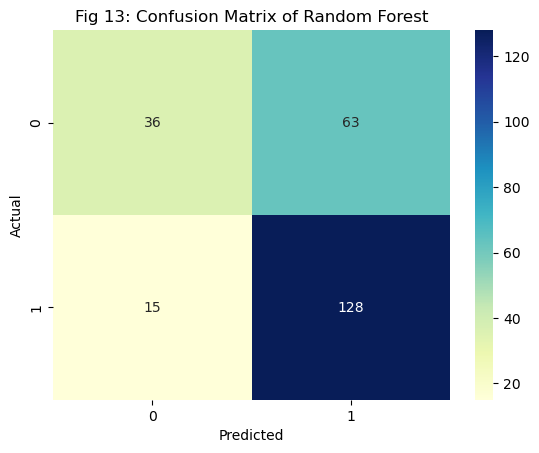

In [48]:
CM_1 = confusion_matrix(Y_test_top, Y_pred_1)

sns.heatmap(CM_1, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Fig 13: Confusion Matrix of Random Forest')
plt.show()

#### Logistic Regression

In [49]:
model_2 = LogisticRegression()
model_2.fit(X_train_top, Y_train_top)

LogisticRegression()

In [50]:
Y_pred_2 = model_2.predict(X_test_top)

In [51]:
print("Accuracy:", accuracy_score(Y_test_top, Y_pred_2))
print("Classification Report:\n", classification_report(Y_test_top, Y_pred_2))

Accuracy: 0.6074380165289256
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.33      0.41        99
           1       0.63      0.80      0.71       143

    accuracy                           0.61       242
   macro avg       0.58      0.57      0.56       242
weighted avg       0.59      0.61      0.58       242



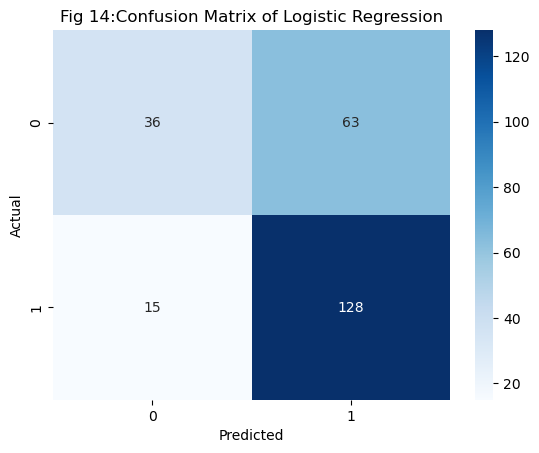

In [52]:
CM_2 = confusion_matrix(Y_test_top, Y_pred_2)

sns.heatmap(CM_1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Fig 14:Confusion Matrix of Logistic Regression')
plt.show()

#### SVM

In [53]:
model_3 = SVC(kernel='rbf', probability=True)
model_3.fit(X_train_top, Y_train_top)


SVC(probability=True)

In [54]:
Y_pred_3 = model_3.predict(X_test_top)

In [55]:
print("Accuracy:", accuracy_score(Y_test_top, Y_pred_3))
print("Classification Report:\n", classification_report(Y_test_top, Y_pred_3))

Accuracy: 0.6198347107438017
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.28      0.38        99
           1       0.63      0.85      0.73       143

    accuracy                           0.62       242
   macro avg       0.60      0.57      0.55       242
weighted avg       0.61      0.62      0.58       242



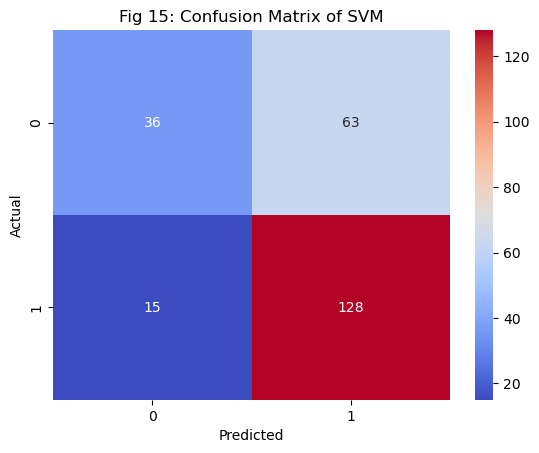

In [56]:
CM_3 = confusion_matrix(Y_test_top, Y_pred_3)

sns.heatmap(CM_1, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Fig 15: Confusion Matrix of SVM')
plt.show()

Among the three models evaluated, Random Forest outperformed both Logistic Regression and Support Vector Machine (SVM) in terms of accuracy. The Random Forest model achieved an accuracy of 67%, while Logistic Regression and SVM recorded 60% and 61% respectively.